## Exercise 3.2

In [41]:
import time
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import root

# Set traditional parameters
S = 80
β = 0.96**(80/S)
α = 0.35
A = 1
σ = 3
δ = 1 - (1-0.05)*(80/S)


# Return on labor
def wf(bvec, nvec):
    b = np.sum(bvec)
    n = np.sum(nvec)
    w = (1-α)*A*(b/n)**α
    return(w)

# Return on capital
def rf(bvec, nvec):
    b = np.sum(bvec)
    n = np.sum(nvec)
    r = α*A*(n/b)**(1-α)-δ
    return(r)


# Uprime
def uprime(c):
    if c > 0: 
        return c**(-σ)
    else:
        return 5000000000
    
def cf(b_ss, nvec):
    c_ss = np.empty(S)
    c_ss[0] = wf(b_ss, nvec)*nvec[0] - b_ss[0]
    for i in range(1, S-1):
        c_ss[i] = wf(b_ss, nvec)*nvec[i] - b_ss[i] + b_ss[i-1]*(1+rf(b_ss, nvec))
    
    c_ss[-1] = wf(b_ss, nvec) * nvec[-1] + (1+rf(b_ss, nvec))*b_ss[-1]
    
    return c_ss
    

def system(bvec):
    
    c = cf(bvec, nvec)
    wc = wf(bvec, nvec)
    rc = rf(bvec, nvec)
    Sol = []

    for i in range(S-1):
        Sol.append(uprime(c[i]) - β*(1+rc)*uprime(c[i+1]))

    return(Sol)



def solve(bvec_guess):
    
    print("running solve")
    b_ss = root(system, bvec_guess).x
    c_ss = cf(b_ss, nvec)
    print("b_ss is ", b_ss)
    print("c_ss is ", c_ss)

    return b_ss, c_ss #, wc, rc, K_ss, L
    


def get_SS(params, bvec_guess, SS_graphs):
    nvec, A, α, δ, β, S = params
    
    start_time = time.clock()
    
    # Solve for the optimal c, b
    b_ss, c_ss = solve(bvec_guess)
    
    K_ss = np.sum(b_ss)
    L_ss = np.sum(nvec)
    print("LSS is", L_ss)
    
    # Compute Euler Error
    r_ss = rf(b_ss, nvec)
    w_ss = wf(b_ss, nvec)
    Y_ss = A * K_ss**α * L_ss**(1-α)
    C_ss = np.sum(c_ss)
    
    # The euler errors
    EulerErrors = system(b_ss)
    
    # Resource counstraint
    
    ss_time = time.clock() - start_time # Place at end of get_SS()
    print('It took %1.3s seconds to solve the OLG model' % ss_time)
    
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 
    'EulerErrors': EulerErrors, 
    'ss_time': ss_time}
    

    return ss_output

In [42]:
bvec = \
    np.array([-0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

print(bvec.shape)
np.sum(bvec)

(79,)


11.399999999999997

In [45]:
### Standard retirement

S= 80
nvec = np.ones(S)
index = round(2*S/3)+1
nvec[index:] = 0.2
print("nvec is ", nvec)
params = nvec, A, α, δ, β, S
result = get_SS(params, bvec, False)



nvec is  [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
running solve


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


b_ss is  [ 0.06305282  0.12998531  0.20094373  0.27607994  0.35555157  0.43952227
  0.52816194  0.62164696  0.72016043  0.82389244  0.93304031  1.04780892
  1.16841095  1.29506718  1.42800683  1.56746784  1.71369724  1.86695149
  2.02749681  2.19560959  2.37157675  2.55569615  2.74827704  2.94964042
  3.16011956  3.38006044  3.60982222  3.84977777  4.10031417  4.36183327
  4.63475225  4.91950419  5.21653869  5.52632248  5.84934012  6.18609462
  6.5371082   6.90292297  7.28410172  7.68122872  8.09491049  8.52577671
  8.97448106  9.44170213  9.92814442 10.43453928 10.96164595 11.51025261
 12.08117753 12.67527015 13.29341232 13.93651952 14.60554212 15.30146677
 14.93260314 14.55106182 14.1563578  13.74798761 13.32542855 12.88813801
 12.43555269 11.9670878  11.48213627 10.98006786 10.46022833  9.92193847
  9.36449317  8.78716047  8.18918045  7.56976425  6.92809292  6.26331628
  5.57455175  4.86088307  4.12135906  3.35499228  2.56075762  1.73759088
  0.88438731]
c_ss is  [1.30284038 1.30136

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [46]:

### Early retirement
nvec = np.ones(S)
nvec[40:] = 0.2
print("nvec_early is ", nvec)
params = nvec, A, α, δ, β, S
result_early = get_SS(params, bvec, False)

nvec_early is  [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
running solve


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


b_ss is  [ 0.12750186  0.26877057  0.42394716  0.59317577  0.77660375  0.97438164
  1.18666326  1.41360578  1.65536971  1.91211899  2.18402106  2.47124688
  2.77397097  3.09237154  3.42663045  3.77693334  4.14346965  4.52643272
  4.92601977  5.34243208  5.77587492  6.22655773  6.69469412  7.18050193
  7.68420335  8.20602495  8.74619773  9.30495725  9.88254364 10.47920172
 11.09518106 11.73073603 12.38612593 13.06161499 13.75747256 14.47397307
 15.2113962  15.97002694 16.75015566 17.55207821 17.10917075 16.66717719
 16.22604588 15.78572483 15.3461617  14.9073038  14.46909804 14.03149098
 13.59442876 13.15785714 12.72172146 12.28596662 11.8505371  11.41537693
 10.98042966 10.54563841 10.11094578  9.67629388  9.24162434  8.80687824
  8.37199615  7.93691806  7.50158346  7.06593121  6.62989962  6.1934264
  5.75644864  5.3189028   4.88072472  4.44184957  4.00221184  3.56174537
  3.12038329  2.67805799  2.23470117  1.79024375  1.34461593  0.89774709
  0.44956585]
c_ss is  [1.45615469 1.444550

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


<function matplotlib.pyplot.show(*args, **kw)>

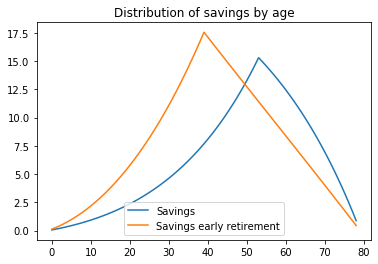

In [51]:
plt.plot(result['b_ss'], label="Savings")
plt.plot(result_early['b_ss'], label="Savings early retirement")
plt.title('Distribution of savings by age')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

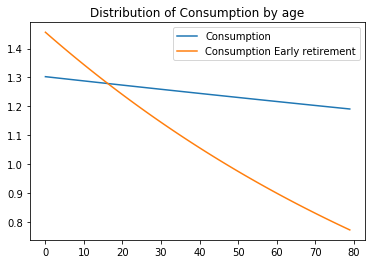

In [50]:
plt.plot(result['c_ss'], label="Consumption")
plt.plot(result_early['c_ss'], label="Consumption Early retirement")
plt.legend()
plt.title('Distribution of Consumption by age')
plt.show

In [53]:
print(result["w_ss"])
print(result["r_ss"])
print(result_early["w_ss"])
print(result_early["r_ss"])

1.3658932020704153
0.0381319101218989
1.5836565519646952
0.016961075029896744


When individuals retire early the wage increase because the labor supply decreases. On the other hand, the interest rate decreases because people want to save more as they are forward looking and planning their retirement